# Quick intro to the cool_maps wrapper around cartopy. 

In [1]:
import cool_maps.plot as cplt
import cartopy.crs as ccrs

# Define map extent
To create a map, we need to define the extent of the map.

cool_maps uses the standard Cartopy extent format, (x0, x1, y0, y1)

* x0 = Westernmost longitude
* x1 = Easternmost longitude
* y0 = Southernmost latitude
* y1 = Northernmost latitude

This variable can be either a list (mutable) or a tuple (immutable). It doesn't really matter.

### Let's take a look at creating a map of the Gulf of Mexico

Create a variable, extent, that contains the bounding box for the GoM.

In [2]:
# Gulf of Mexico
extent = [-99, -79, 18, 31]

In [3]:
# This is a quick command to display the docstring in your Jupyter notebook
cplt.create?

Signature:
cplt.create(
    extent,
    proj=<cartopy.crs.Mercator object at 0x15c865400>,
    features=True,
    edgecolor='black',
    landcolor='tan',
    oceancolor=array([0.59375   , 0.71484375, 0.8828125 ]),
    ticks=True,
    gridlines=False,
    bathymetry=False,
    isobaths=(-1000, -100),
    ax=None,
    labelsize=14,
    figsize=(11, 8),
)
Docstring:
Create a cartopy map within a certain extent. 

Args:
    extent (tuple or list): Extent (x0, x1, y0, y1) of the map in the given coordinate system.
    proj (cartopy.crs class, optional): Define a projected coordinate system with flat topology and Euclidean distance. Defaults to ccrs.Mercator().
    labelsize (int, optional): Font size for axis labels. Defaults to 14.
    gridlines (bool, optional): Add gridlines. Defaults to False
    ticks (bool, optional): Calculate appropriately spaced ticks. Defaults to True.
    features (bool, optional): Add preferred map settings: colors, rivers, lakes, etc.. Defaults to True.
    edg

As you can see in the docstring for this function, the only required parameter is extent. Every other parameter is optional. We already defined the extent of the Gulf of Mexico in the cell above. Let's call the function with only the required parameter, extent.

(<Figure size 792x576 with 1 Axes>, <GeoAxesSubplot:>)

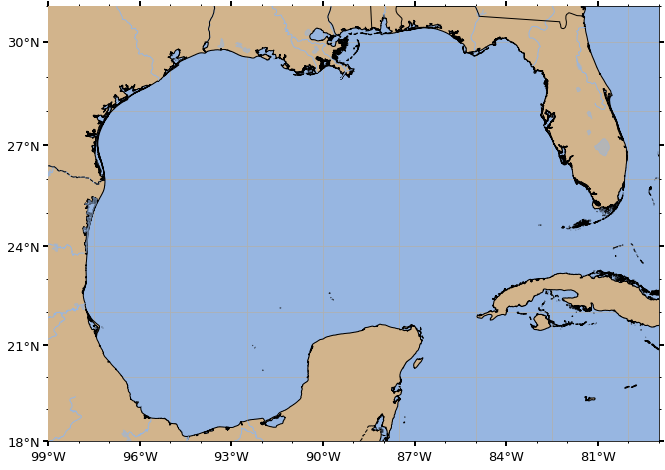

In [4]:
cplt.create(extent, gridlines=True)

A map is created using the function defaults. This map is in the Mercator projection with tan land, a blue ocean, and black coastlines. The function also added lakes, rivers, state lines, and country borders to the map.

## Let's use the function with another projection, LambertCylindrical

(<Figure size 792x576 with 1 Axes>,
 <GeoAxesSubplot:xlabel='Longitude', ylabel='Latitude'>)

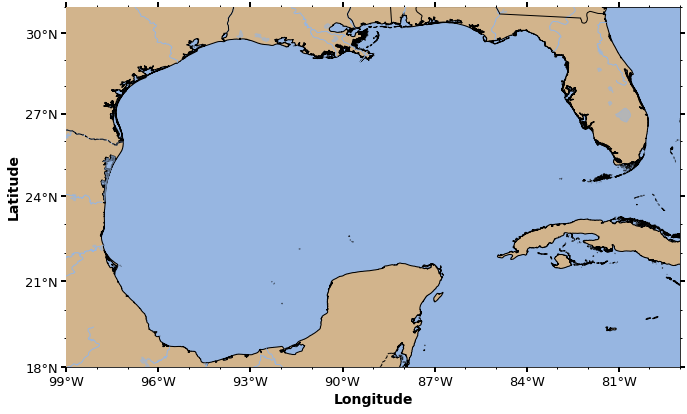

In [5]:
cplt.create(extent, proj=ccrs.LambertCylindrical())

This map looks squished vertically. We just wanted to see how we would create the map in another projection.

## Let's change the colors of some of the physical features in our map

(<Figure size 792x576 with 1 Axes>,
 <GeoAxesSubplot:xlabel='Longitude', ylabel='Latitude'>)

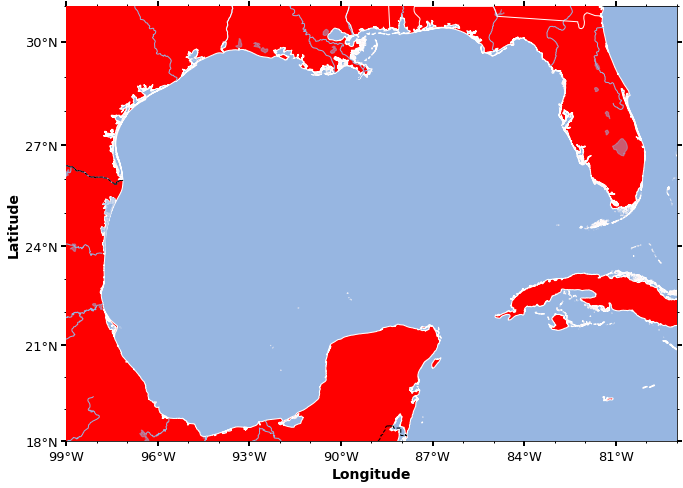

In [6]:
cplt.create(extent, proj=ccrs.Mercator(), landcolor='red', edgecolor='white')

## Create a map without ticks

(<Figure size 792x576 with 1 Axes>,
 <GeoAxesSubplot:xlabel='Longitude', ylabel='Latitude'>)

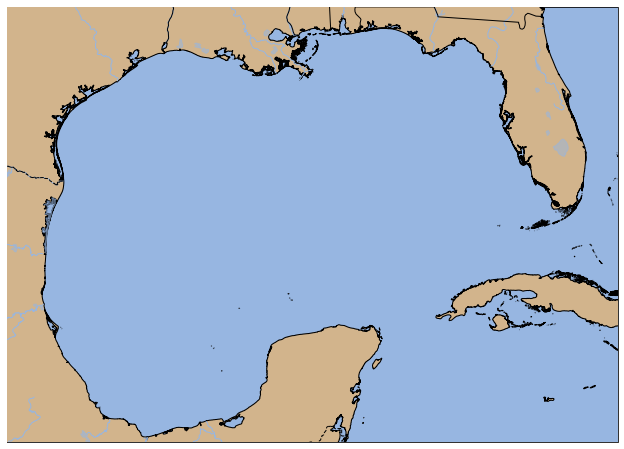

In [7]:
cplt.create(extent, proj=ccrs.Mercator(), ticks=False)

## Create a map with bathymetry contours. 
The defaults are 1000 and 100m contour lines

(<Figure size 792x576 with 1 Axes>,
 <GeoAxesSubplot:xlabel='Longitude', ylabel='Latitude'>)

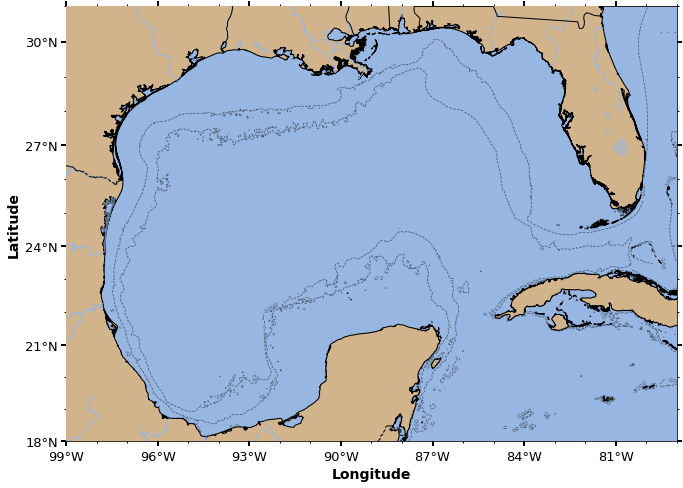

In [8]:
cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True)

## We can change the bathymetry contours with by passing a tuple or list to the parameter, isobaths.
Here we will create isobaths of 1000, 500, and 10m

(<Figure size 792x576 with 1 Axes>,
 <GeoAxesSubplot:xlabel='Longitude', ylabel='Latitude'>)

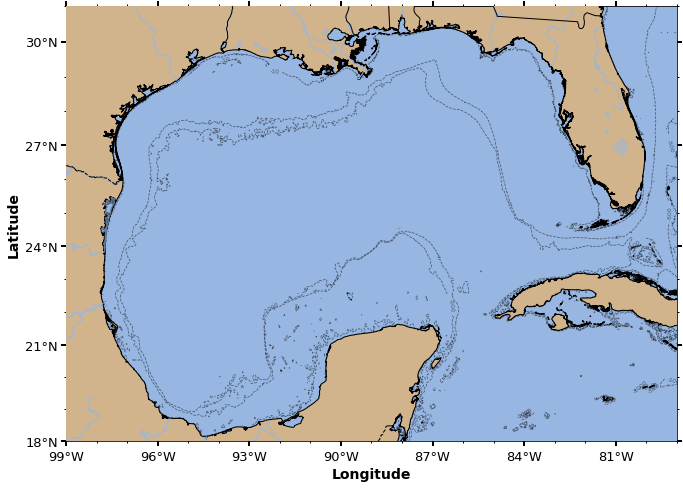

In [9]:
cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True, isobaths=(-1000, -500, -10))

## Let's adjust the figsize of the map so we can see the contour line labels easier.
We will create a large map with a 16:9 aspect ratio, which is the aspect ratio of powerpoint slides.

(<Figure size 2304x1296 with 1 Axes>,
 <GeoAxesSubplot:xlabel='Longitude', ylabel='Latitude'>)

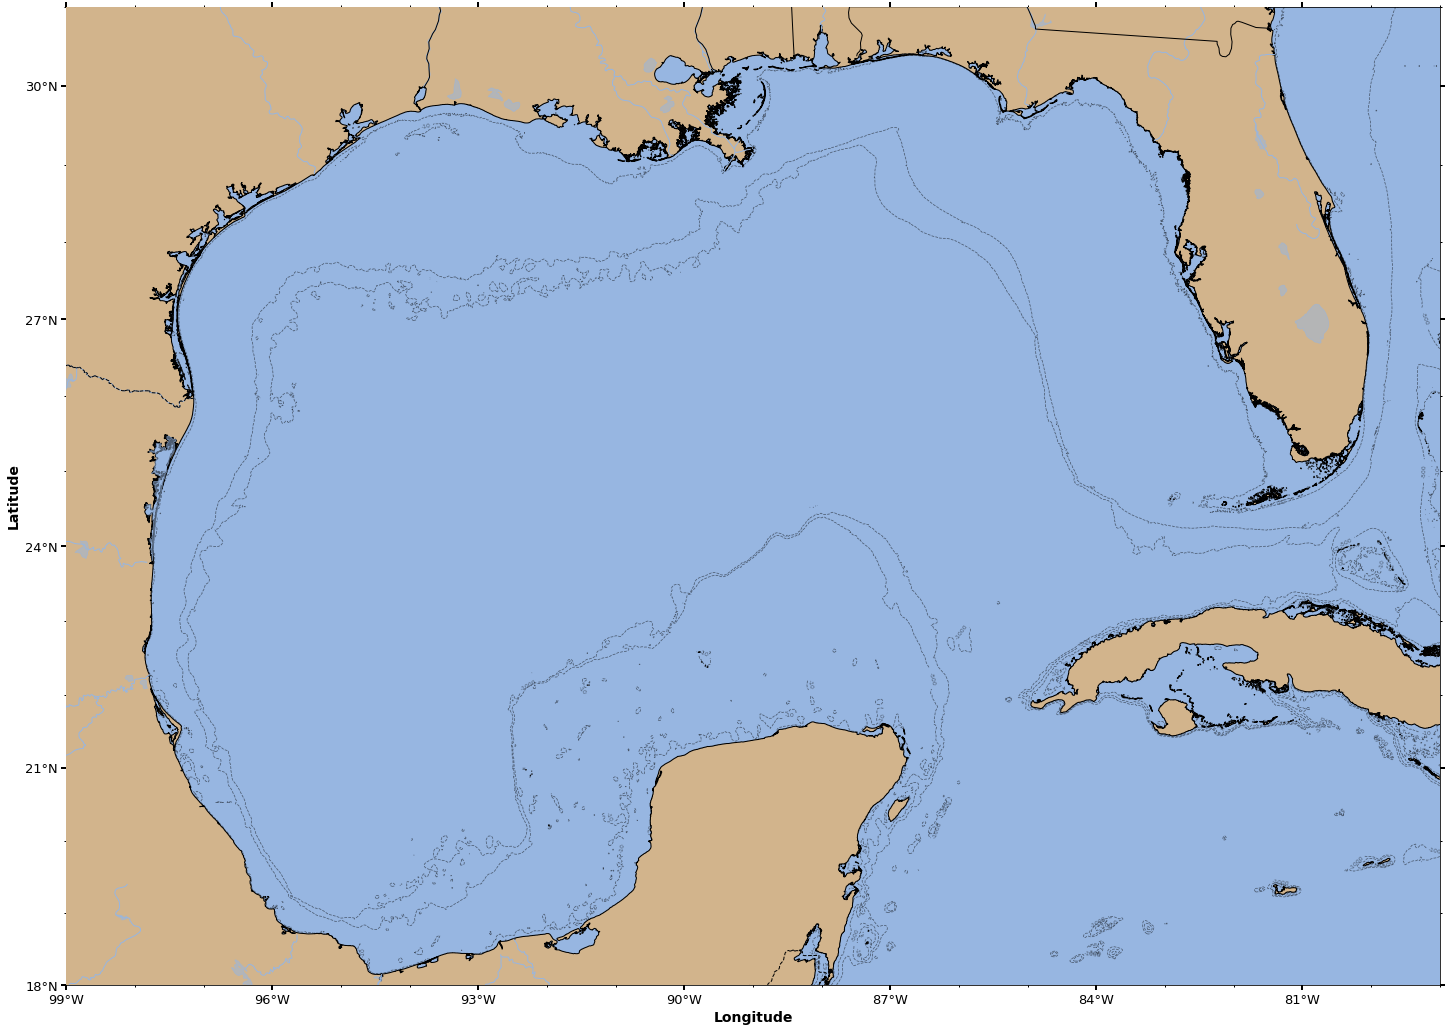

In [10]:
cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True, isobaths=(-1000, -500, -10), figsize=(32,18))

## We can create a blank map.
Setting features=False, will create a blank map, but still in the specified projection. We can fully customize the map afterwards.

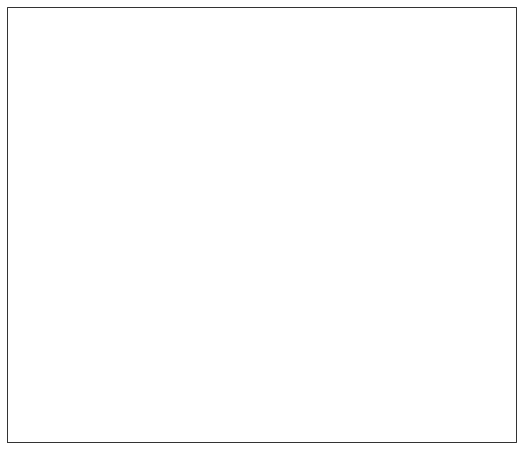

In [4]:
fig, ax = cplt.create(extent, features=False, ticks=False)

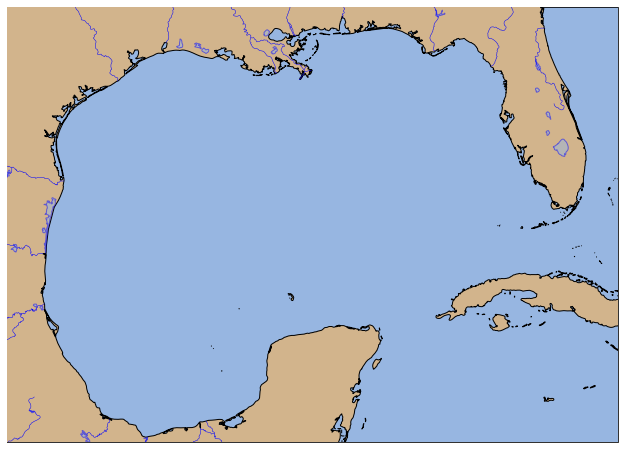

In [36]:
import cartopy.feature as cfeature

# Create an empty map in Mercator projection without the 'automatic features'
fig, ax = cplt.create(extent, features=False, ticks=False)

# Specify
edgecolor="black"
landcolor="tan"
oceancolor=cfeature.COLORS['water'] #cfeature.COLORS['water'] is the standard 
zorder=0.1

state_lines = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)

# LAND = cfeature.GSHHSFeature(scale='full')
resol = '10m'
land = cfeature.NaturalEarthFeature(
    'physical', 'land', resol,
    edgecolor='face',
    facecolor='tan'
)
lakes = cfeature.NaturalEarthFeature('physical', 'lakes', \
    scale=resol, edgecolor='b', facecolor=cfeature.COLORS['water'])
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', \
    scale=resol, edgecolor='b', facecolor='none')
bodr = cfeature.NaturalEarthFeature(category='cultural', 
    name='admin_0_boundary_lines_land', scale=resol, facecolor='none', alpha=0.7)

# # Axes properties and features
ax.set_facecolor(oceancolor) # way faster than adding the ocean feature above
ax.set_extent(extent)
ax.add_feature(land, 
               edgecolor=edgecolor, 
               facecolor=landcolor,
               zorder=zorder+10)
ax.add_feature(lakes, zorder=zorder+10.2, alpha=0.5)
ax.add_feature(rivers, linewidth=0.5, zorder=zorder+10.2)
ax.add_feature(bodr, linestyle='--', edgecolor='k', alpha=1)



## There are some other functions in cool_maps. 
You can use help(cplt) to see all available functions. cplt is the name of your imported module

In [13]:
help(cplt)

Help on module cool_maps.plot in cool_maps:

NAME
    cool_maps.plot

FUNCTIONS
    add_bathymetry(ax, lon, lat, elevation, levels=-1000, zorder=5, transform=<cartopy.crs.PlateCarree object at 0x11eb588b0>, transform_first=False)
        Plot bathymetry lines on map
        
        Args:
            ax (matplotlib.axes): matplotlib axes
            lon (array-like): bathymetry longitudes
            lat (array-like): bathymetry latitudes
            elevation (array-like): bathymetry elevation data
            levels (tuple, optional): 
                Determines the number and positions of the contour lines / regions. Defaults to (-1000).
            zorder (int, optional): Drawing order for this function on the axes. Defaults to 5.
            transform (_type_, optional): Tells Cartopy what coordinate system your data are defined in. Defaults to crs.PlateCarree().
            transform_first (bool, optional): 
                Indicate that Cartopy points should be transformed befor

## We can use the export_fig to save our figures
This is a wrapper around .savefig() that minimizes whitespace around the plot.

In [14]:
import os
import matplotlib.pyplot as plt

save_path = os.getcwd()
print(save_path)

fig, ax= cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True, isobaths=(-1000, -500, -10), figsize=(16,9))
cplt.export_fig(save_path, "test.png")
plt.close()

/Users/mikesmith/Documents/github/cool_maps


Let's load the plot we just saved

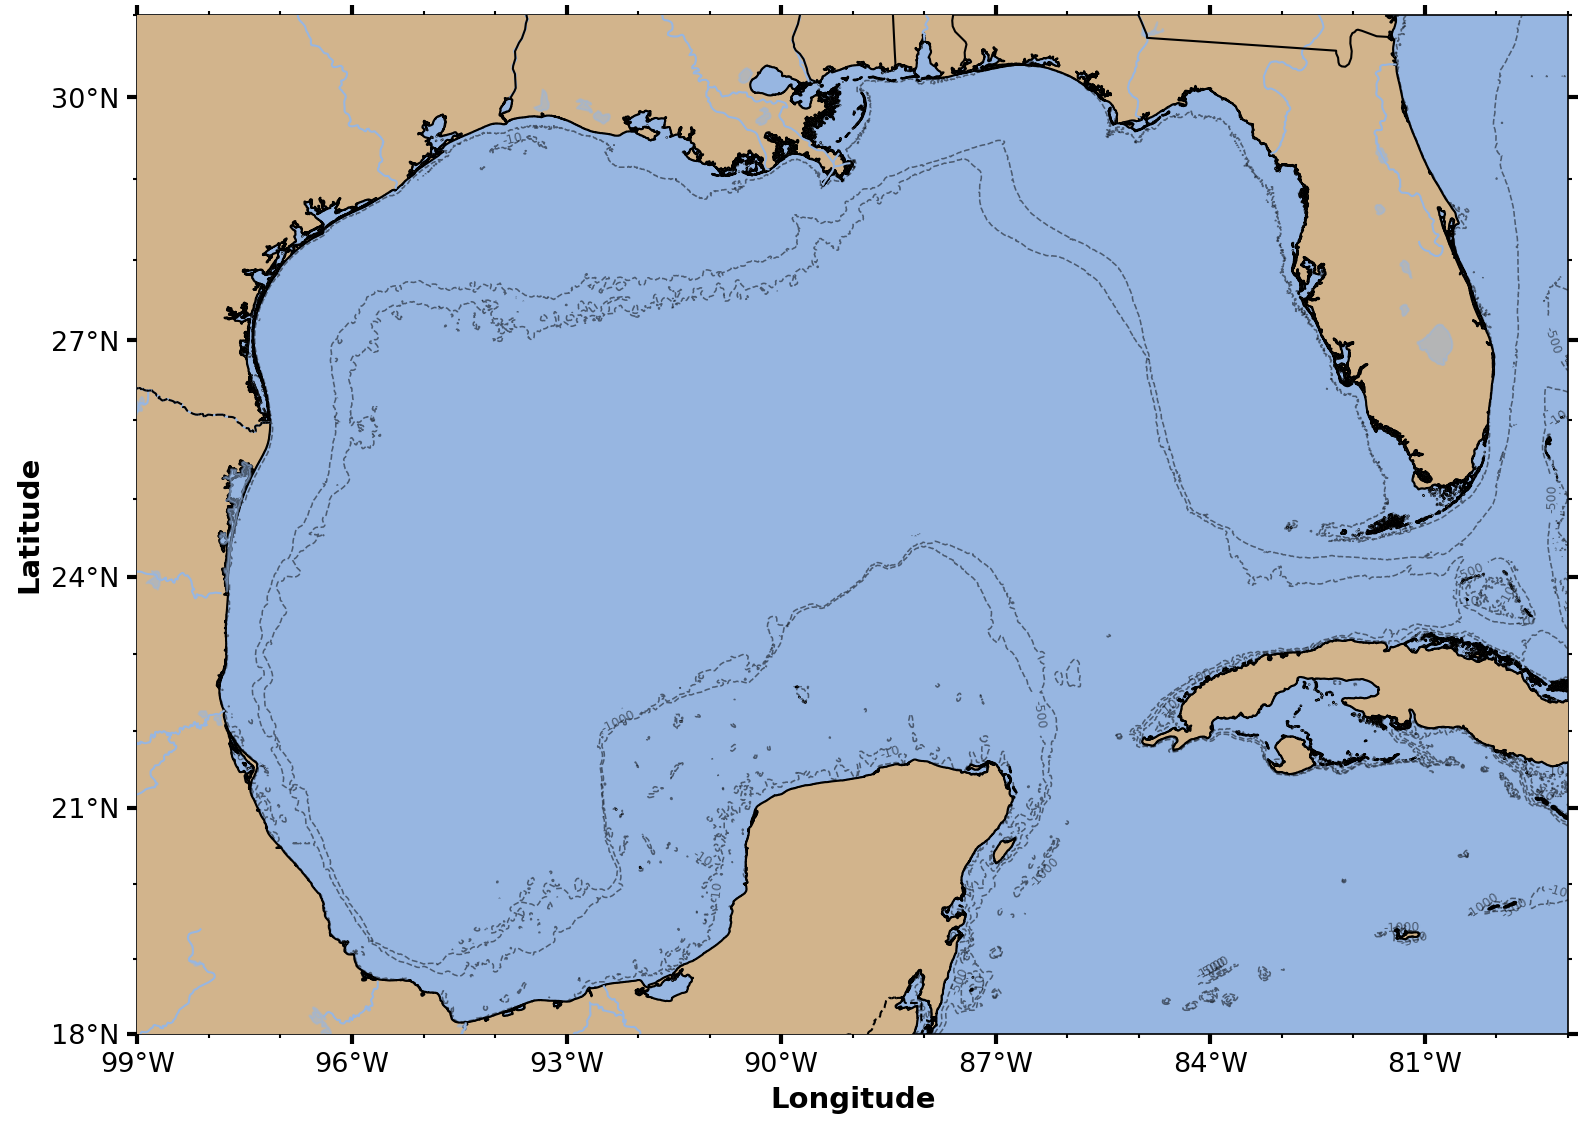

In [15]:
from IPython.display import Image
Image(filename='test.png') 

## Save your figure as a pickle file
We can serialize the figure that we created in order to reuse it again in the future. This saves the trouble of processing it everytime we make a plot.

In [17]:
fig, ax= cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True, isobaths=(-1000, -500, -10), figsize=(16,9))
cplt.save_fig(fig, save_path, "test.pkl")
plt.close()

## Load your pickled figure

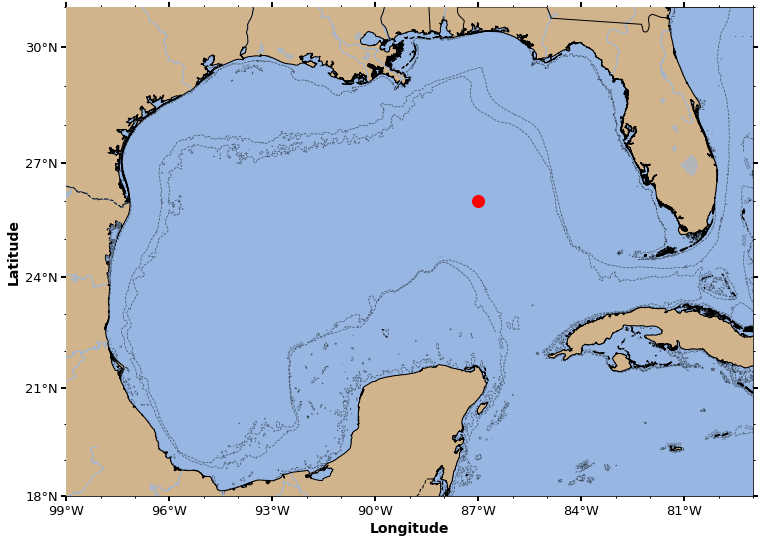

In [18]:
fig, ax = cplt.load_fig(os.path.join(save_path, "test.pkl"))
plt.plot(-87, 26, 'ro', markersize=12, transform=ccrs.PlateCarree())